In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"C:\Users\bagal\OneDrive\Desktop\DataSets\Salary_dataset.csv")

In [3]:
dataset = pd.DataFrame(dataset)

In [4]:
dataset.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [5]:
dataset.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
dataset.shape

(30, 3)

In [7]:
dataset.isna().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [8]:
dataset.notnull().sum()

Unnamed: 0         30
YearsExperience    30
Salary             30
dtype: int64

In [9]:
dataset.shape

(30, 3)

In [10]:
df = dataset.drop(dataset.columns[0],axis = 1)

In [11]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


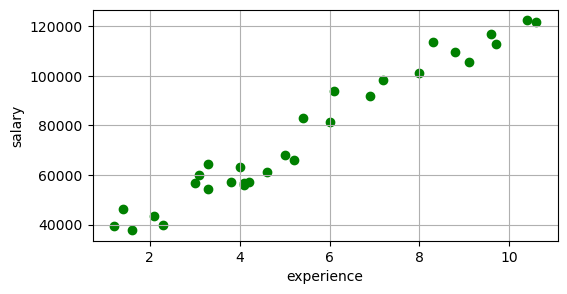

In [12]:
plt.figure(figsize = (6,3))
plt.scatter(df['YearsExperience'],df['Salary'] , color = 'green',label = 'Actual data')
plt.xlabel('experience')
plt.ylabel('salary')
plt.grid(True)

In [13]:
x =np.array(df.iloc[:,0:1])
y = np.array(df.iloc[:,1:])

In [14]:
x_mean = np.mean(x)
y_mean = np.mean(y)
print(f"x_mean ={x_mean}  y_mean = {y_mean}")

x_mean =5.413333333333332  y_mean = 76004.0


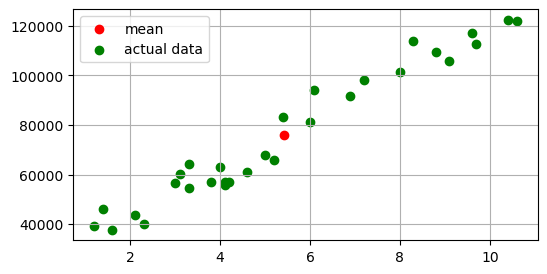

In [15]:
plt.figure(figsize = (6,3))
plt.scatter(x_mean,y_mean,color = 'red',label = 'mean')
plt.scatter(x,y,color = 'green' ,label= 'actual data')
plt.legend()
plt.grid(True)

In [16]:
slope_m = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x- x_mean)**2)
slope_m

9449.962321455076

In [17]:
intercept_c = y_mean - slope_m * x_mean
intercept_c

24848.2039665232

In [18]:
y_pred = slope_m * x + intercept_c 
y_pred.T

array([[ 36188.15875227,  38078.15121656,  39968.14368085,
         44693.12484158,  46583.11730587,  53198.09093089,
         54143.08716303,  56033.07962732,  56033.07962732,
         60758.06078805,  62648.05325234,  63593.04948449,
         63593.04948449,  64538.04571663,  68318.03064522,
         72098.0155738 ,  73988.00803809,  75878.00050238,
         81547.97789525,  82492.9741274 ,  90052.94398456,
         92887.932681  , 100447.90253816, 103282.8912346 ,
        108007.87239533, 110842.86109176, 115567.84225249,
        116512.83848464, 123127.81210966, 125017.80457395]])

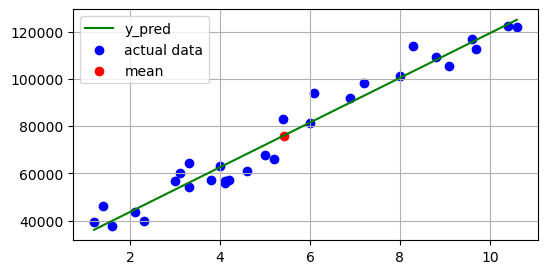

In [35]:
plt.figure(figsize =(6,3))
plt.plot(x,y_pred, color = 'green',label = 'y_pred')
plt.scatter(x,y, color='blue',label = 'actual data')
plt.scatter(x_mean,y_mean, color = 'red',label = 'mean')
plt.grid(True)
plt.legend()

In [20]:
sse = np.sum((y-y_pred)**2)
sse

938128551.6684284

In [21]:
x.T

array([[ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.3,  3.8,  4. ,
         4.1,  4.1,  4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,
         8. ,  8.3,  8.8,  9.1,  9.6,  9.7, 10.4, 10.6]])

In [22]:
y.T

array([[ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
         54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
         61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
         98274., 101303., 113813., 109432., 105583., 116970., 112636.,
        122392., 121873.]])

In [23]:
x10 = slope_m * 10 + intercept_c
x10

119347.82718107395

In [24]:
mse = np.mean((y - y_pred)**2)
mse

31270951.722280946

In [25]:
slope_m,intercept_c

(9449.962321455076, 24848.2039665232)

In [26]:
lr = 0.00000000000000001
epochs = 1000

for i in range(epochs):
    derivative_m = (-2/len(x)) * np.sum(x*mse)
    derivative_c = (-2/len(x)) * np.sum(mse)

    m = slope_m - lr * derivative_m 
    c = intercept_c - lr * derivative_c
print(m,c)

9449.96232145846 24848.203966523222


In [27]:
y_hat = m * x + c
y_hat.T,y_pred.T

(array([[ 36188.15875227,  38078.15121657,  39968.14368086,
          44693.12484159,  46583.11730588,  53198.0909309 ,
          54143.08716304,  56033.07962734,  56033.07962734,
          60758.06078807,  62648.05325236,  63593.0494845 ,
          63593.0494845 ,  64538.04571665,  68318.03064523,
          72098.01557382,  73988.00803811,  75878.0005024 ,
          81547.97789527,  82492.97412742,  90052.94398459,
          92887.93268102, 100447.90253819, 103282.89123463,
         108007.87239536, 110842.8610918 , 115567.84225252,
         116512.83848467, 123127.81210969, 125017.80457398]]),
 array([[ 36188.15875227,  38078.15121656,  39968.14368085,
          44693.12484158,  46583.11730587,  53198.09093089,
          54143.08716303,  56033.07962732,  56033.07962732,
          60758.06078805,  62648.05325234,  63593.04948449,
          63593.04948449,  64538.04571663,  68318.03064522,
          72098.0155738 ,  73988.00803809,  75878.00050238,
          81547.97789525,  82492.9741

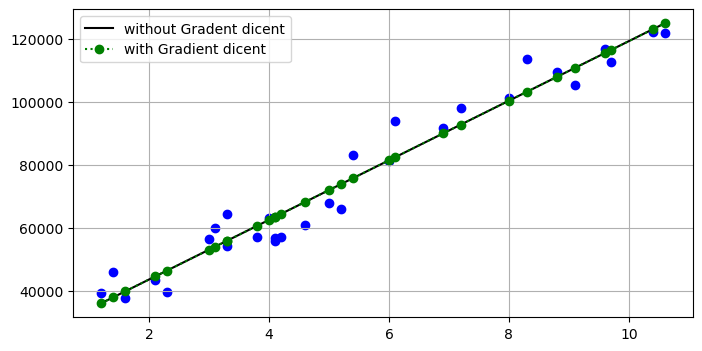

In [28]:
plt.figure(figsize = (8,4))
plt.grid(True)
plt.plot(x,y_pred,color='black',label= 'without Gradent dicent')
plt.plot(x,y_hat,color = 'green',label = 'with Gradient dicent',linestyle=':',marker='o')
plt.scatter(x,y,color = 'blue')
plt.legend()